# Overview

In this notebook, we will do the data visualization and statistic on SamSum dataset.

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
# configuring Pandas to exhibit larger columns

import pandas as pd

pd.set_option('display.max_colwidth', 1000)

# Exploring the dataset

We are going to analyze each dataset separately.

In [5]:
train=pd.read_csv('/kaggle/input/samsum-dataset-text-summarization/samsum-train.csv')
test=pd.read_csv('/kaggle/input/samsum-dataset-text-summarization/samsum-test.csv')
val=pd.read_csv('/kaggle/input/samsum-dataset-text-summarization/samsum-validation.csv')
type(train)

pandas.core.frame.DataFrame

## Data Visualization

In [6]:
from IPython.display import display

def display_feature_list(features, feature_type):
    '''
    This function displays the features within each list for each type of data
    '''
    print(f'\n{feature_type} Features:')
    print(', '.join(features) if features else 'None')


def describe_dataframe(dataframe):
    global categorical_features, continuous_features, binary_features
    categorical_features=[col for col in dataframe.columns if dataframe[col].dtype=='object']
    binary_features=[col for col in dataframe.columns if dataframe[col].nunique() <=2 and dataframe[col].dtype!='object']
    continuous_features=[col for col in dataframe.columns if dataframe[col].dtype!='object' and col not in binary_features]
    
    print(f'\n{type(dataframe).__name__} shape: {dataframe.shape}')
    print(f'\n{dataframe.shape[0]:,.0f} samples')
    print(f'\n{dataframe.shape[1]:,.0f} attributes')
    print(f'\nMissing Data: \n{dataframe.isnull().sum()}')
    print(f'\nDuplicates:{dataframe.duplicated().sum()}')
    print(f'\nData types:\n{dataframe.dtypes}')
    
    display_feature_list(categorical_features, 'Categorical')
    display_feature_list(continuous_features, 'Continuous')
    display_feature_list(binary_features, 'Binary')
    
    print(f'\n{type(dataframe).__name__} Head: \n')
    display(dataframe.head(5))
    print(f'\n{type(dataframe).__name__} Tail: \n')
    display(dataframe.tail(5))


describe_dataframe(train)


DataFrame shape: (14732, 3)

14,732 samples

3 attributes

Missing Data: 
id          0
dialogue    1
summary     0
dtype: int64

Duplicates:0

Data types:
id          object
dialogue    object
summary     object
dtype: object

Categorical Features:
id, dialogue, summary

Continuous Features:
None

Binary Features:
None

DataFrame Head: 



,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-),Amanda baked cookies and will bring Jerry some tomorrow.
1,13728867,Olivia: Who are you voting for in this election? \r\nOliver: Liberals as always.\r\nOlivia: Me too!!\r\nOliver: Great,Olivia and Olivier are voting for liberals in this election.
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I was going to do lots of stuff but ended up procrastinating\r\nTim: What did you plan on doing?\r\nKim: Oh you know, uni stuff and unfucking my room\r\nKim: Maybe tomorrow I'll move my ass and do everything\r\nKim: We were going to defrost a fridge so instead of shopping I'll eat some defrosted veggies\r\nTim: For doing stuff I recommend Pomodoro technique where u use breaks for doing chores\r\nTim: It really helps\r\nKim: thanks, maybe I'll do that\r\nTim: I also like using post-its in kaban style",Kim may try the pomodoro technique recommended by Tim to get more stuff done.
3,13730747,"Edward: Rachel, I think I'm in ove with Bella..\r\nrachel: Dont say anything else..\r\nEdward: What do you mean??\r\nrachel: Open your fu**ing door.. I'm outside",Edward thinks he is in love with Bella. Rachel wants Edward to open his door. Rachel is outside.
4,13728094,"Sam: hey overheard rick say something\r\nSam: i don't know what to do :-/\r\nNaomi: what did he say??\r\nSam: he was talking on the phone with someone\r\nSam: i don't know who\r\nSam: and he was telling them that he wasn't very happy here\r\nNaomi: damn!!!\r\nSam: he was saying he doesn't like being my roommate\r\nNaomi: wow, how do you feel about it?\r\nSam: i thought i was a good rommate\r\nSam: and that we have a nice place\r\nNaomi: that's true man!!!\r\nNaomi: i used to love living with you before i moved in with me boyfriend\r\nNaomi: i don't know why he's saying that\r\nSam: what should i do???\r\nNaomi: honestly if it's bothering you that much you should talk to him\r\nNaomi: see what's going on\r\nSam: i don't want to get in any kind of confrontation though\r\nSam: maybe i'll just let it go\r\nSam: and see how it goes in the future\r\nNaomi: it's your choice sam\r\nNaomi: if i were you i would just talk to him and clear the air","Sam is confused, because he overheard Rick complaining about him as a roommate. Naomi thinks Sam should talk to Rick. Sam is not sure what to do."



DataFrame Tail: 



,id,dialogue,summary
14727,13863028,"Romeo: You are on my ‘People you may know’ list.\nGreta: Ah, maybe it is because of the changed number of somebody’s?\nGreta: I don’t know you?\nRomeo: This might be the beginning of a beautiful relationship\nRomeo: How about adding me on your friend list and talk a bit?\nGreta: No.\nRomeo: Okay I see.",Romeo is trying to get Greta to add him to her friend list but she refuses.
14728,13828570,"Theresa: <file_photo>\r\nTheresa: <file_photo>\r\nTheresa: Hey Louise, how are u?\r\nTheresa: This is my workplace, they always give us so much food here 😊\r\nTheresa: Luckily they also offer us yoga classes, so all the food isn't much of a problem 😂\r\nLouise: Hey!! 🙂 \r\nLouise: Wow, that's awesome, seems great 😎 Haha\r\nLouise: I'm good! Are you coming to visit Stockholm this summer? 🙂\r\nTheresa: I don't think so :/ I need to prepare for Uni.. I will probably attend a few lessons this winter\r\nLouise: Nice! Do you already know which classes you will attend?\r\nTheresa: Yes, it will be psychology :) I want to complete a few modules that I missed :)\r\nLouise: Very good! Is it at the Uni in Prague?\r\nTheresa: No, it will be in my home town :)\r\nLouise: I have so much work right now, but I will continue to work until the end of summer, then I'm also back to Uni, on the 26th September!\r\nTheresa: You must send me some pictures, so I can see where you live :) \r\nLouise: I will,...","Theresa is at work. She gets free food and free yoga classes. Theresa won't go to visit Louise in Stockholm, because she will prepare for university psychology lessons. She'll be back at uni on 26th September."
14729,13819050,"John: Every day some bad news. Japan will hunt whales again\r\nErica: Yes, I've read this. It's very upsetting\r\nJohn: Cruel Japanese\r\nFaith: I think this is a racist remark. Because Island and Norways has never joined this international whaling agreement\r\nErica: really? I haven't known, everybody is so outraged by Japan\r\nFaith: sure, European hypocrisy \r\nJohn: not entirely. Scandinavians don't use the nets that Japanese use, so Norway and Island kill much less specimens that Japan will\r\nFaith: oh, it's much more complex than one may expect\r\nJohn: True, but the truth is, that all of them should stop\r\nJohn: and this decision is a step back\r\nFaith: yes, this is worrying\r\nErica: And it seems that the most important whaling countries are out of the agreement right now\r\nFaith: yes, seems so\r\nJohn: Just like USA leaving the Paris Agreement",Japan is going to hunt whales again. Island and Norway never stopped hunting them. The Scandinavians kill fewer whales than the Japanese.
14730,13828395,"Jennifer: Dear Celia! How are you doing?\r\nJennifer: The afternoon with the Collins was very pleasant, nice folks, but we missed you.\r\nJennifer: But I appreciate your consideration for Peter.\r\nCelia: My dear Jenny! It turns out that my decision not to come, though I wanted so much to see you again and Peter and the Collins, was right. Yesterday it all developed into a full bore cold. Sh.....\r\nCelia: All symptoms like in a text book.\r\nCelia: Luckily it's contagious only on the first 2, 3 days, so when we meet next week it should be alright.\r\nCelia: Thanks for asking! Somehow for all of us Peter comes first now.\r\nJennifer: That's too bad. Poor you...\r\nJennifer: I'll be driving to FR, do you want me to bring you sth? It's on my way.\r\nCelia: Thank you dear! I was at the pharmacy yesterday and had done my shopping the day before.\r\nCelia: You'd better still stay away from me in case I'm still contagious\r\nJennifer: Right. So I'll only leave a basket on your terrace. A...","Celia couldn't make it to the afternoon with the Collins and Jennifer as she is ill. She's working, but doesn't want to meet with Jennifer as it might be contagious. Jennifer will leave a basket with cookies on Celia's terrace."
14731,13729017,"Georgia: are you ready for hotel hunting? We need to book somethin

In [7]:
# Checking the empty values of specific data and remove it

mask=train['dialogue'].isnull() # crating mask with null dialogues
filtered_train=train[mask] # filtering dataframe
filtered_train

,id,dialogue,summary
6054,13828807,NaN,problem with visualization of the content


In [8]:
# removing it
train=train.dropna()

# removing Id from categorical features list
categorical_features.remove('id')

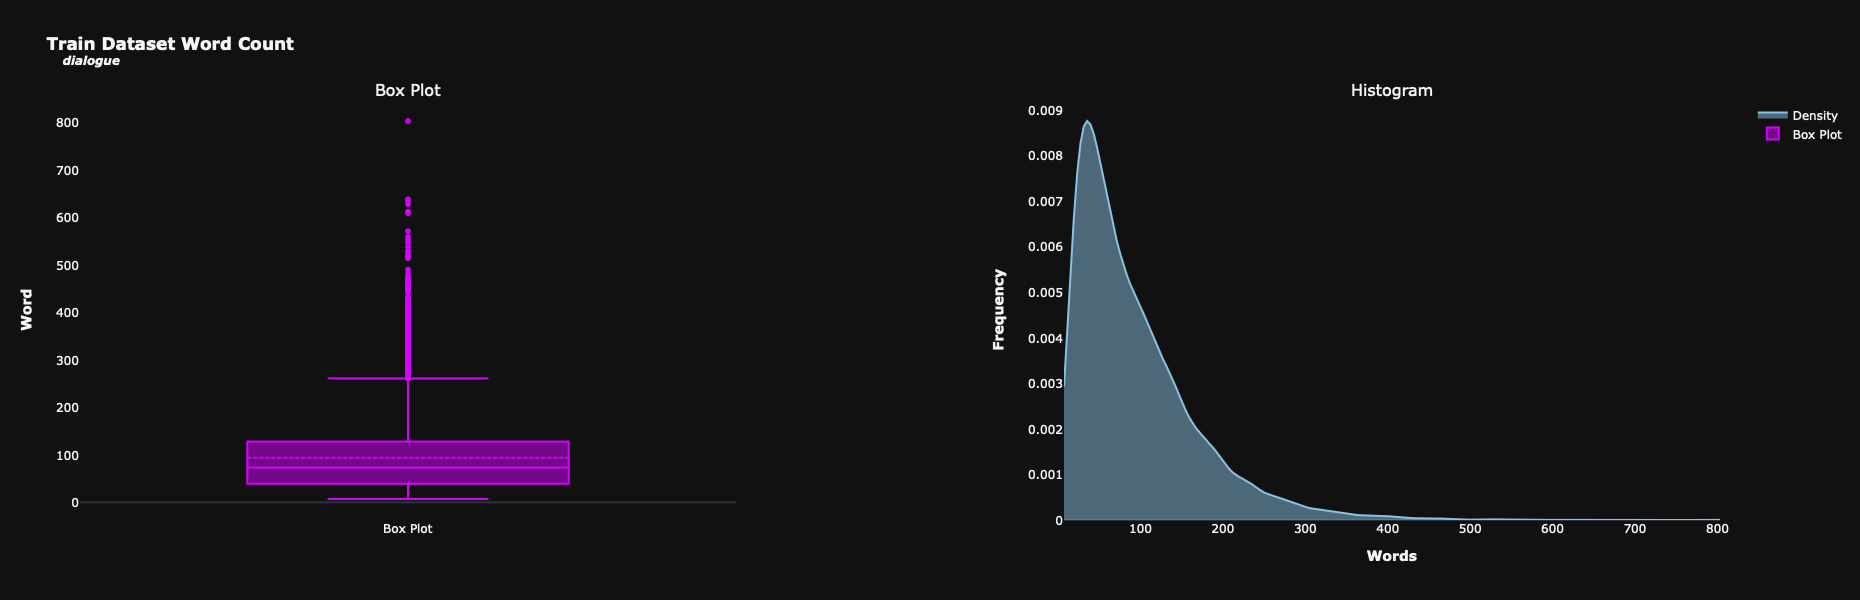

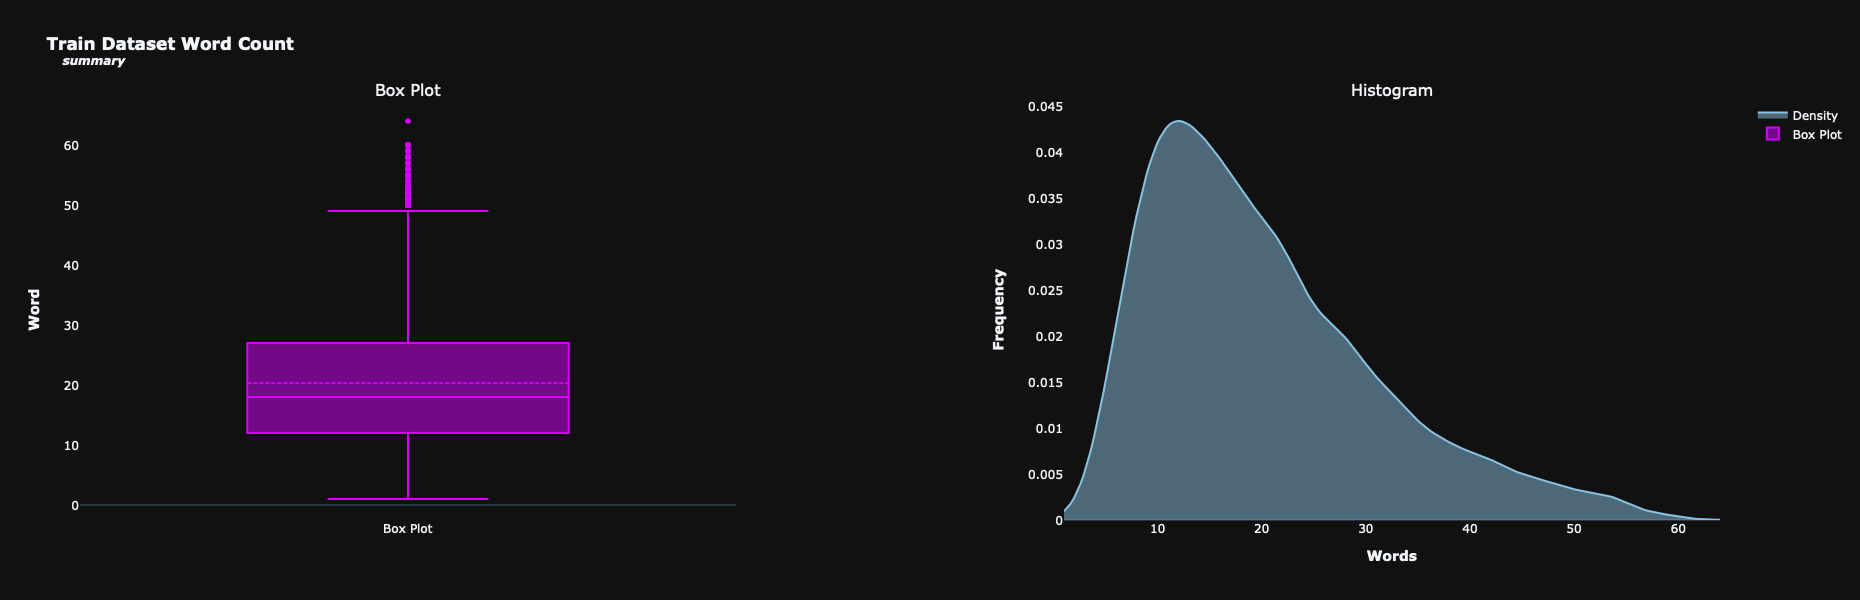

In [9]:
# Data Visualization
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
from scipy.stats import gaussian_kde

# paper_color=
# bg_color =

template='plotly_dark'

def histogram_boxplot(df, hist_color, box_color, height, width, legend, name):
    '''This function plots a Histogram and a Box plot side by side
    
    Parameters:
    * hist_color: the color of the histogram
    * box_color: the color of the boxplots
    * heigh and width: Image size
    * legend = Either to display legend or not
    '''
    
    features=df.select_dtypes(include=[np.number]).columns.tolist()
    
    for feat in features:
        try:
            fig=make_subplots(rows=1, cols=2, subplot_titles=['Box Plot', 'Histogram'], horizontal_spacing=0.2)
            density=gaussian_kde(df[feat])
            x_vals=np.linspace(min(df[feat]), max(df[feat]), 200)
            density_vals=density(x_vals)
            
            fig.add_trace(go.Scatter(x=x_vals, y=density_vals, mode='lines', fill='tozeroy', name='Density', line_color=hist_color), row=1, col=2)
            fig.add_trace(go.Box(y=df[feat], name='Box Plot', boxmean=True, line_color=box_color), row=1, col=1)
            fig.update_layout(title={'text':f'<b>{name} Word Count<br><sup><i>&nbsp;&nbsp;&nbsp;&nbsp;{feat}</i></sup></b>', 'x':.025, 'xanchor':'left'}, 
                              margin=dict(t=100),
                              showlegend=legend, 
                              template=template,
                              #plot_bgcolor=bg_color,
                              #paper_bgcolor=paper_color,
                              height=height,
                              width=width,
                             )
            fig.update_yaxes(title_text=f'<b>Word</b>', row=1, col=1, showgrid=False)
            fig.update_xaxes(title_text='', row=1, col=1, showgrid=False)
            fig.update_yaxes(title_text='<b>Frequency</b>', row=1, col=2, showgrid=False)
            fig.update_xaxes(title_text=f'<b>Words</b>', row=1, col=2, showgrid=False)
            
            fig.show()
            print('\n')
        except Exception as e:
            print(f'An error occurred: {e}')
            
    
    
df_text_length=pd.DataFrame() # crating an empty dataframe
for feat in categorical_features: # iterating through features --> dialogue & summary
    df_text_length[feat]=train[feat].apply(lambda x: len(str(x).split())) # counting words for each feature

# ploting histogram-boxplot
histogram_boxplot(df_text_length, '#89c2e0', '#d500ff', 600, 1000, True, 'Train Dataset')

From the result above, dialogues consist of about 94 words. we do have some outliers with very extensive texts, going way over 300 words per dialogue. Summaries are naturally shorters texts, consisting of about 20 words on average, although we also have some outliers with extensive summaries.


## Statistic on data(train, summaries)

We can also use scikit-learn's `TfidfVectorizer` to extarct more infor on the dialogues and summaries available. This function will give us a dataframe with the top n most frequent terms in the corpus, which we select by using the `max_features` parameter.

In this dataframe, each column represents the $n$ most frequent terms in the overall corpus, while each row represents one entry in the original dataframe, such as `train`. For each term in each entry we will see the **TF-IDF score** associated with it, which quantifies the relevance of a term in a given dialogue - or summary - relative to its frequency across all other dialogues - or summaries. We will also use the `bgram_range` parameter to select the most frequent words(`unigrams`), the most frequent sequence of two words(`bigrams`), and the most frequent sequence of three words(`trigrams`). The `stop_words='english'` parameter will help us filter out common stop-words of the English language, which are words that do not add up much to the overall context, such as "and", "of", etc.

And we will plot a `heatmap` displaying the correlations between these terms. This may help us to understand how frequently they are used together in dialogues.

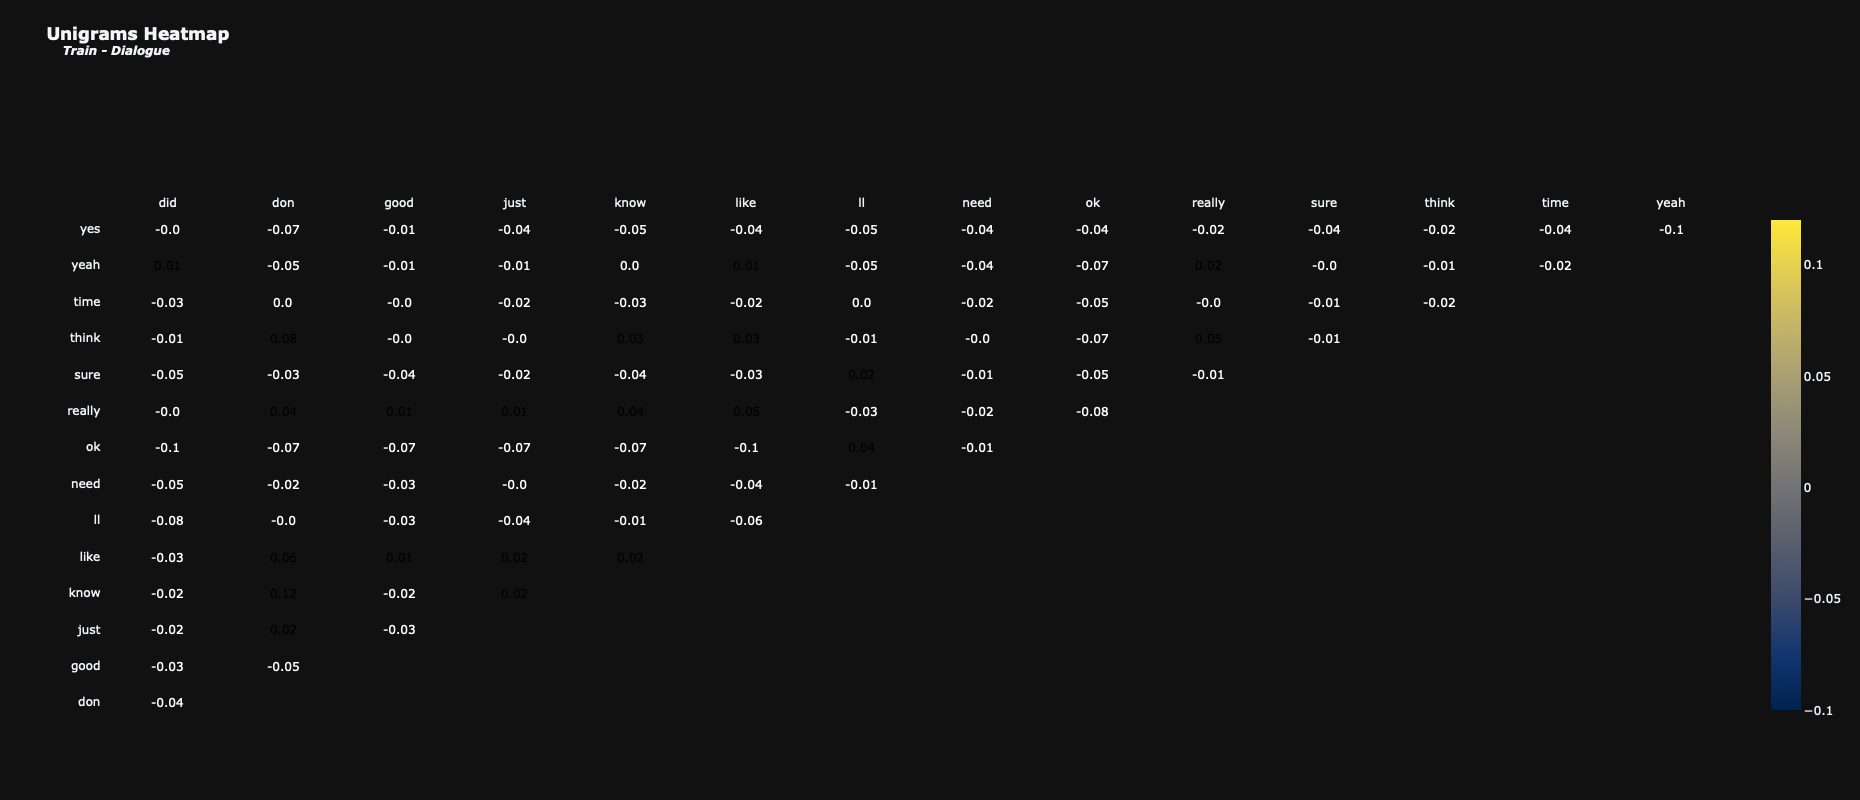

In [15]:
# NLP libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# data visualization
import plotly.figure_factory as ff

colormap='cividis'

def plot_correlation(df, title, subtitle, height, width, font_size):
    '''
    This function is resposible to plot a correlation map among features in the dataset.
    
    Parameters:
    * height=Define height
    * width=Define width
    * font_size=Define the font size for the annotations
    '''
    corr=np.round(df.corr(numeric_only=True), 2)
    mask=np.triu(np.ones_like(corr, dtype=bool))
    c_mask=np.where(~mask, corr, 100)
    
    c=[]
    for i in c_mask.tolist()[1:]:
        c.append([x for x in i if x!=100])
    
    fig=ff.create_annotated_heatmap(z=c[::-1], x=corr.index.tolist()[:-1], y=corr.columns.tolist()[1:][::-1], colorscale=colormap)
    fig.update_layout(title={'text': f'<b>{title} Heatmap<br><sup>&nbsp;&nbsp;&nbsp;&nbsp;<i>{subtitle}</i></sup></b>', 'x':.025,'xanchor':'left','y':.95},
                      margin=dict(t=210, l=110),
                      yaxis=dict(autorange='reversed', showgrid=False),
                      xaxis=dict(showgrid=False),
                      template=template,
                      height=height,
                      width=width)
    fig.add_trace(go.Heatmap(z=c[::-1], colorscale=colormap, showscale=True, visible=False))
    fig.data[1].visible=True
    
    for i in range(len(fig.layout.annotations)):
        fig.layout.annotations[i].font.size=font_size
        
    fig.show()
    

vectorizer=TfidfVectorizer(max_features=15, stop_words='english') # top 15 terms
x=vectorizer.fit_transform(train['dialogue'])
df_tfidfvect=pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidfvect, 'Unigrams','Train - Dialogue', 800, 800, 12)

We can see the correlations between these terms are neither strongly positive nor strongly negative. The most positively correlated terms are `don` and `know`, at 0.12. It is relevant to observe that the `TridVectorizer` function performs some changes to the text, such as removing contractions, which explains why the word don't appears without its apostrophe 't.

It is also intersting to notice a negative correlation - although still not extremely significant - between the terms `yes` and `yeah`. Maybe this happens because it would be redundant to include both in the same dialogue, or perhaps the data captures a tendency of individuals to use `yeah` instead of `yes` during conversations. These are some hypotheses we can consider when analyzing this type of heatmaps.

Let's perform the same abalysis to the summaries.

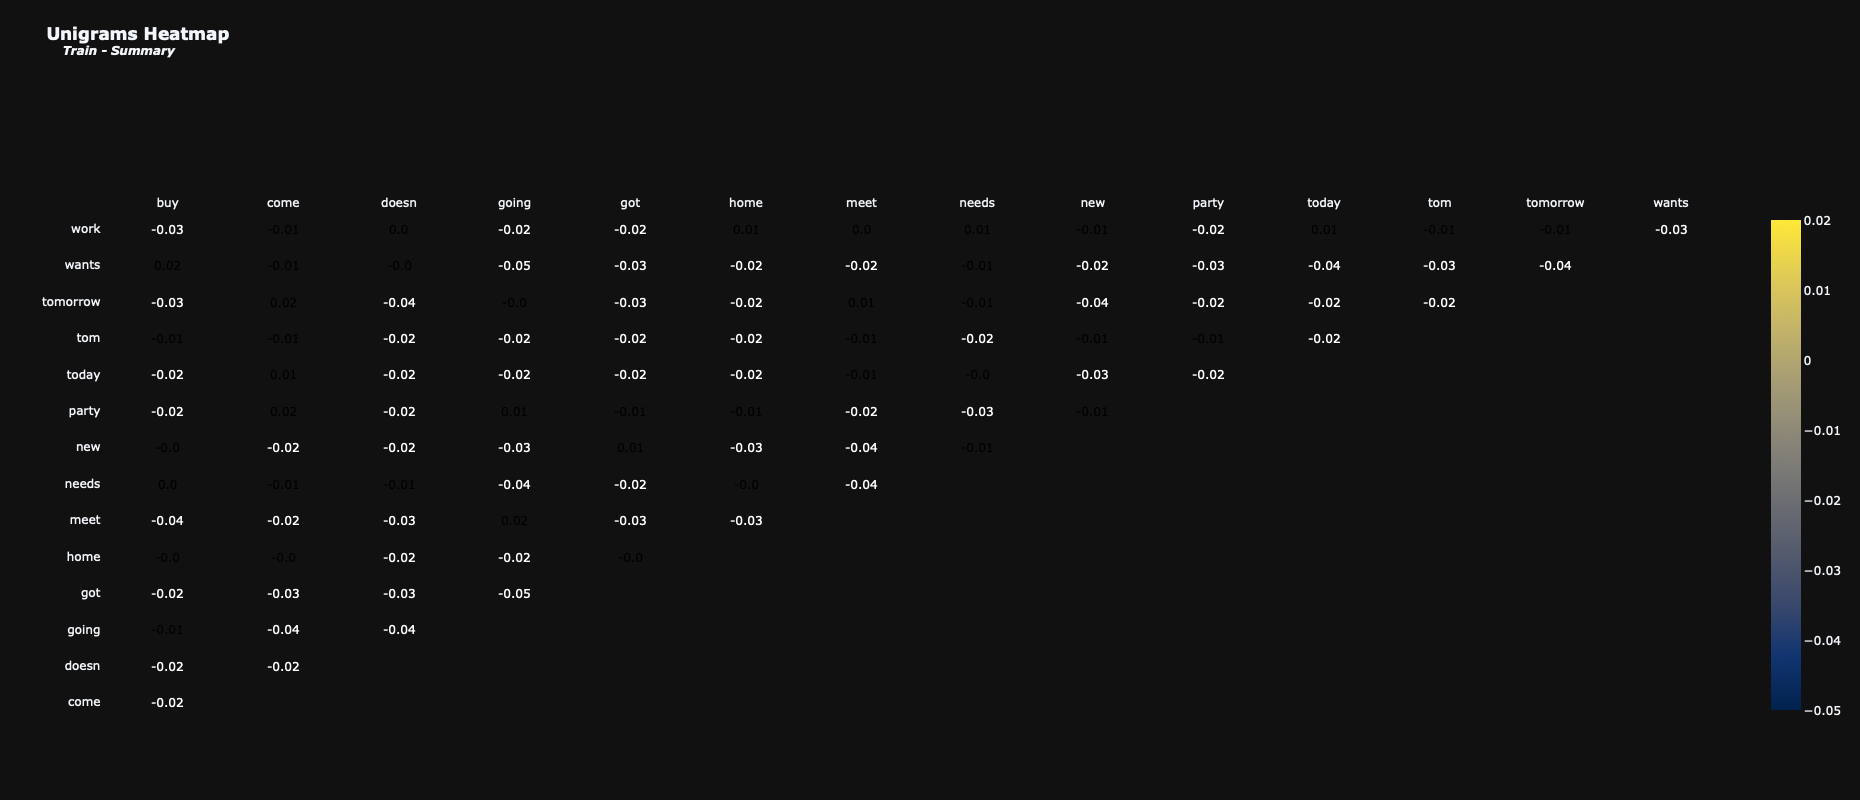

In [18]:
vectorizer=TfidfVectorizer(max_features=15, stop_words='english')
x=vectorizer.fit_transform(train['summary'].fillna(''))
df_tfidvect=pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidvect, 'Unigrams', 'Train - Summary', 800, 800, 12)

The correlations of terms in summaries seem to be more pronounced than those in dialogues, even though these correlaions are still not strong. This suggests that summaries may convey relevant information more succinctly than full dialogues, which is exactly the idea behind a summary.

We have positively correlated pairs such as `going` and `meet`, `come` and `party`, as well as `buy` and `wants`. It makes perfect sense to see these unigrams appearing together across texts. Conversely, it's reasonable for negatively correlated pairs **not** to co-occur frequently in texts, such as `going` and `wants`, and `going` and `got`.


### Analyzation bigrams across dialogues and summaries

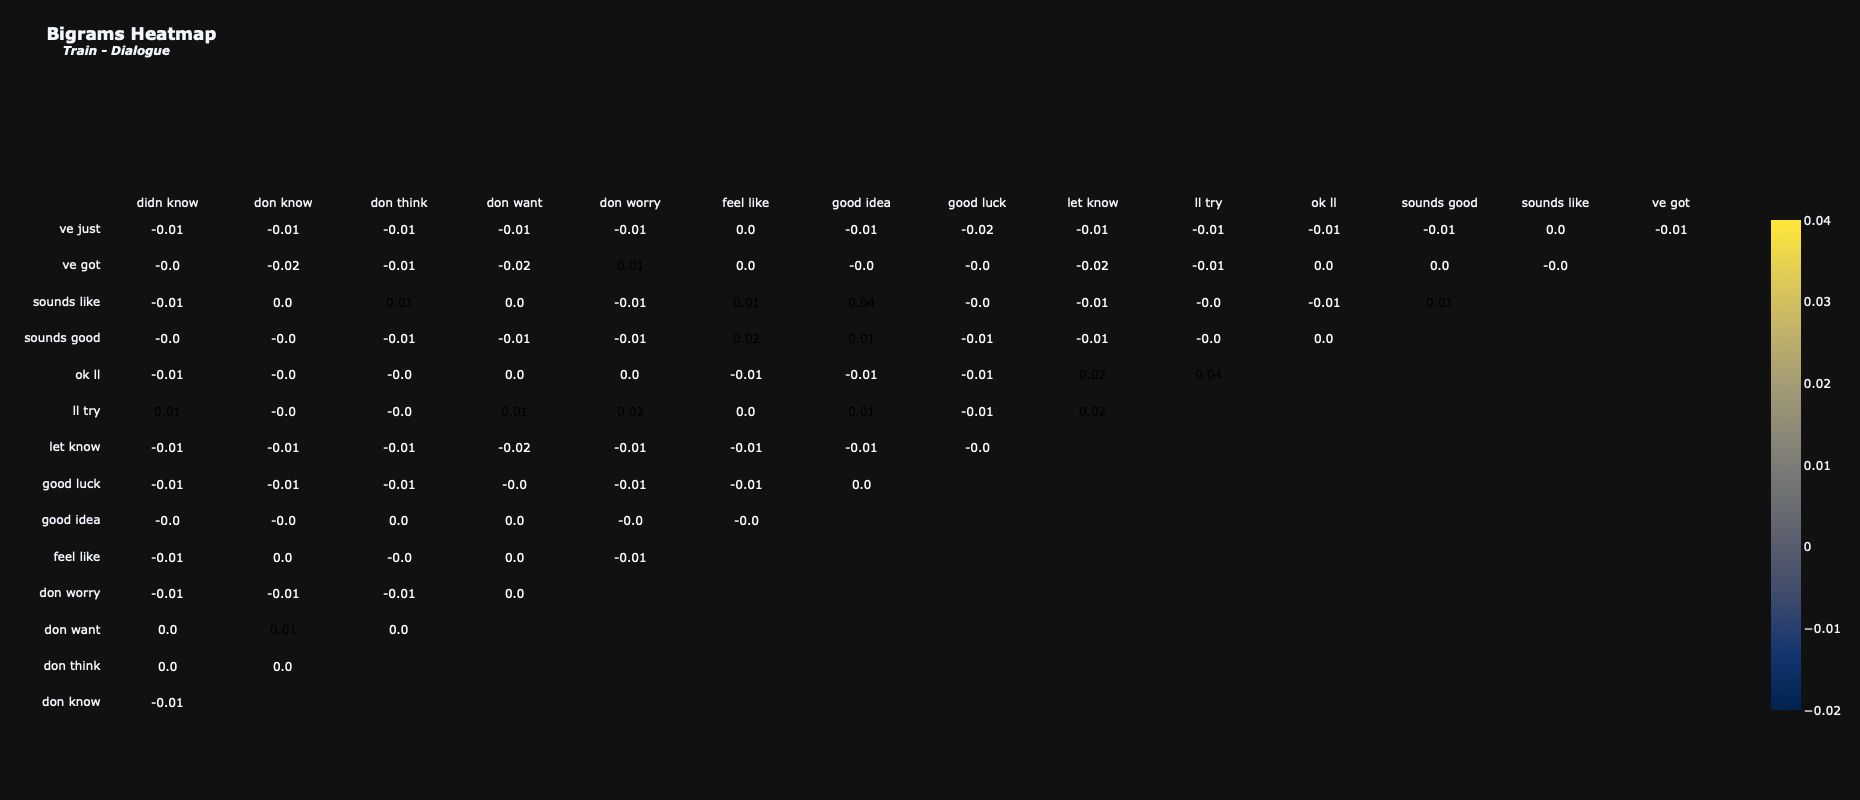

In [22]:
vectorizer=TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(2,2))
x=vectorizer.fit_transform(train['dialogue'].fillna(''))
df_tfidfvect=pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidfvect, 'Bigrams', 'Train - Dialogue', 800, 800, 12)

The correlations are not extremely strong. Still, we can see some pairs that seem reasonable to be together, such as `good idea` and `sounds like`.

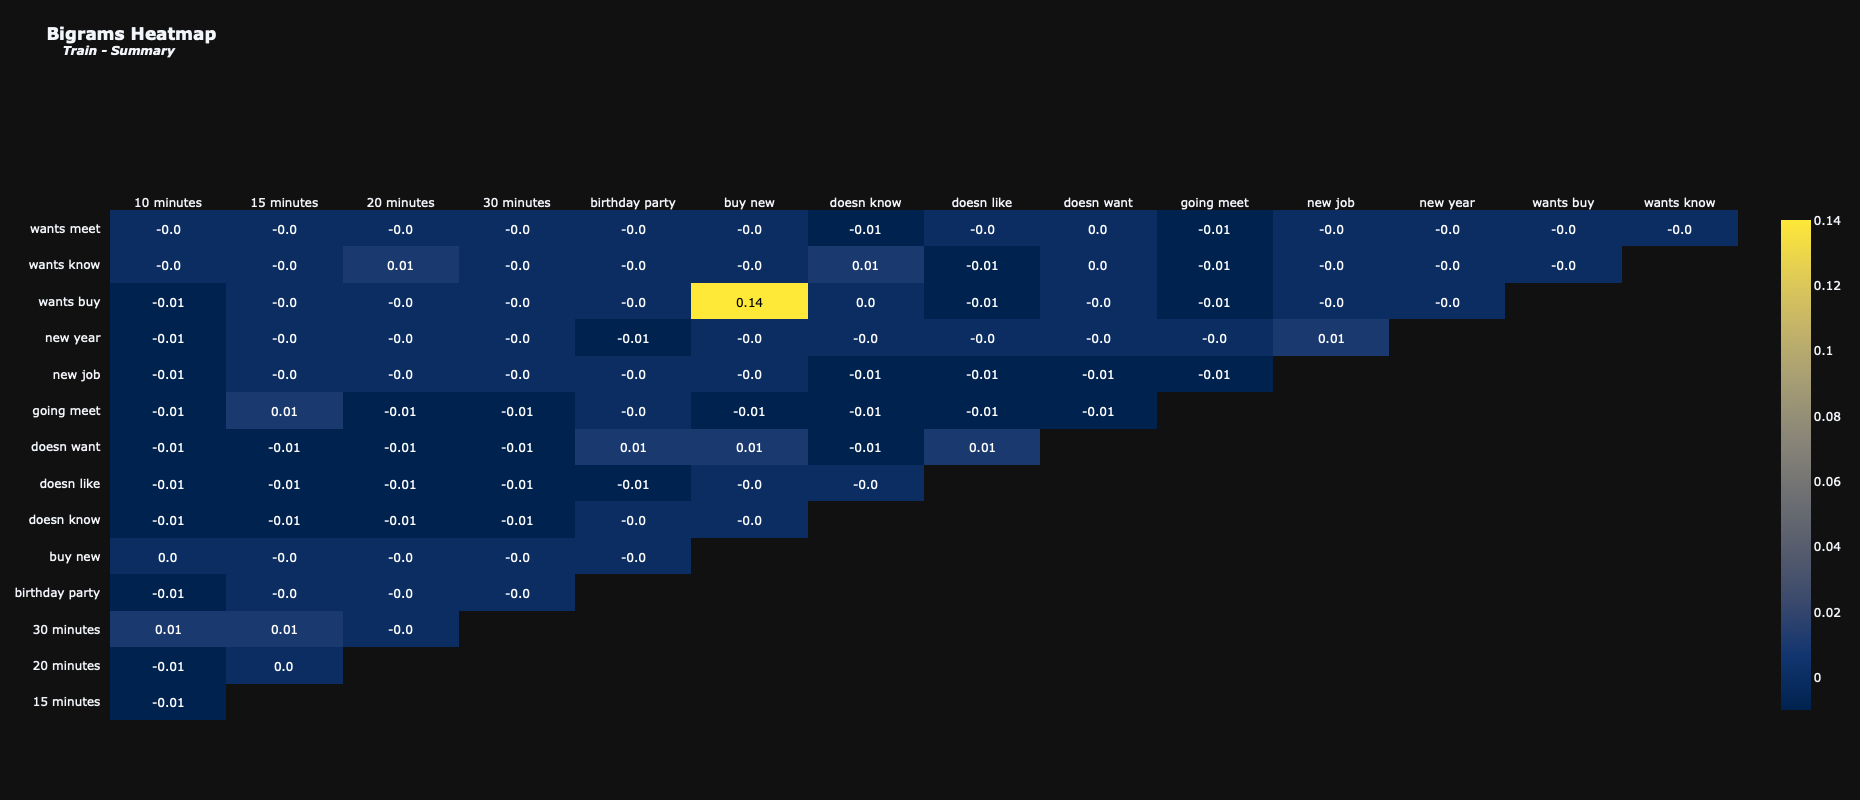

In [23]:
vectorizer=TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(2,2))
x=vectorizer.fit_transform(train['summary'].fillna(''))
df_tfidvect=pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidvect, 'Bigrams', 'Train - Summary', 800, 800, 12)

We have only one correlation between the pairs `wants buy` and `buy new`. The other terms do not appear to have any kind of correlation at all.

It is interesting to see the tendency of the summaries to contain information on minutes, which does not seem to be present in the dialogues. We can even investigate further this relationship by querying some summaries where the bigram 15 minutes appearts in the summary.

In [27]:
# filtering dataset to see those containing the term `15 minutes` in the summary.
filtered_train=train[train['summary'].str.contains('15 minutes', case=False, na=False)]
filtered_train.head()

,id,dialogue,summary
136,13827893,"Kate: I'm here <file_other>\r\nKate: there was no place in Red Lion\r\nSteven: hey! but it's quite far away\r\nKate: c'mon it's just 10 min by bike!\r\nSteven: yes, but I'm not by bike\r\nKate: car?\r\nSteven: nope\r\nSteven: by foot :P :P \r\nSteven: anyway google maps says 15 min and I'm there:D\r\nKate: ok, w8in ^^",Kate will meet with Steven in 15 minutes.
428,13811484-1,"Jenny: Let's go out to eat.\r\nLucy: That sounds like fun.\r\nJenny: Where do you wanna go?\r\nLucy: Let me think a minute.\r\nJenny: I feel like Chinese.\r\nLucy: That sounds yummy.\r\nJenny: I know a good Chinese restaurant.\r\nLucy: How far away is it?\r\nJenny: It's only 10 minutes from my place.\r\nLucy: Do we have to book a table?\r\nJenny: Oh, no. We can walk right in.\r\nLucy: Cool. Will be in 15 minute. I'm really hungry!",Jenny and Lucy are going to a Chinese restaurant to eat. They do not need to book a table. Lucy will be at Jenny's in 15 minutes.
570,13818296,Danielle: hey where RU?\r\nJuan: I told u I'd be late!\r\nDanielle: but it's been almost 45 mins!\r\nDanielle: <file_gif>\r\nJuan: I'll be there in 15 minutes\r\nJuan: <file_gif>,Juan is almost 45 minutes late. He'll be there in 15 minutes.
1213,13682296-1,"John: I know you will be outraged but I like to provoke you :P\r\nTyre: What is it?\r\nJohn: I talked to our neighbour today and I am really starting to think that religious people are just stupid.\r\nTyre: Gosh. You know it's a stupid claim.\r\nJohn: I know that there are some clever, religious individuals. But statistically religious people are stupid.\r\nTyre: It's not true. There are stupid religious people and clever ones, just like atheists.\r\nJohn: But most of academics are not religious.\r\nTyre: How do you know it?\r\nJohn: Experience but also some data I've seen.\r\nTyre: It's just not true.\r\nJohn: They are mostly people believing in things that have nothing to do with logic or reason: miracles, ghosts, witchcraft, just as our neighbour.\r\nTyre: I think it's only one part of them. There are theologians, people who actually know a lot about philosophy, logic etc.\r\nJohn: Yes, there are also people doing ""scientifically"" tarot, horoscopes and astrology.\r\nTyre: You ca...",John and Tyre's neighbour stopped John in the staircase and talked about some miracles for 15 minutes. John thinks that religious people are stupid. Tyre disagrees with this generalization.
1812,13820691,"Madge: are you alive? xD\r\nDorothy: i'm still drunk\r\nMadge: xDDDDDDDD jeeez\r\nFelicia: I don't know...how much did i drink?\r\nMadge: like 10 rounds\r\nFelicia: SHIT \r\nFelicia: you gotta be kidding me ahahaha xDDDDDDDDDDDDDDDDDD\r\nDorothy: of course she is\r\nDorothy: it was at least 15\r\nFelicia: ;________________;\r\nFelicia: was nice to meet you girls...shame on me as always\r\nDorothy: oh stop talking\r\nDorothy: just live the moment B-)\r\nFelicia: how am i supossed to live the moment if i don't remember the half o the night XD\r\nDorothy: well it happens :p \r\nMadge: we gotta repeat it, i had a lot of fun :D\r\nDorothy: i'm in. in 15min?\r\nFelicia: you're crazy ;-;",Dorothy is still intoxicated after at least 15 rounds of drink yesterday and can't remember much of what happened. She would like to meet her friends for a drink again in 15 minutes.


The last row gives us an idea of why we see so many terms related to minutes in summaries, but not in dialogues. In dialogues, poeple may write `15min` together or even other forms of it, such as `15m`, whereas the summaries give us a patternized desciption, making it natural to be more prominent than other forms to describe time.

### Visualization the trigrams

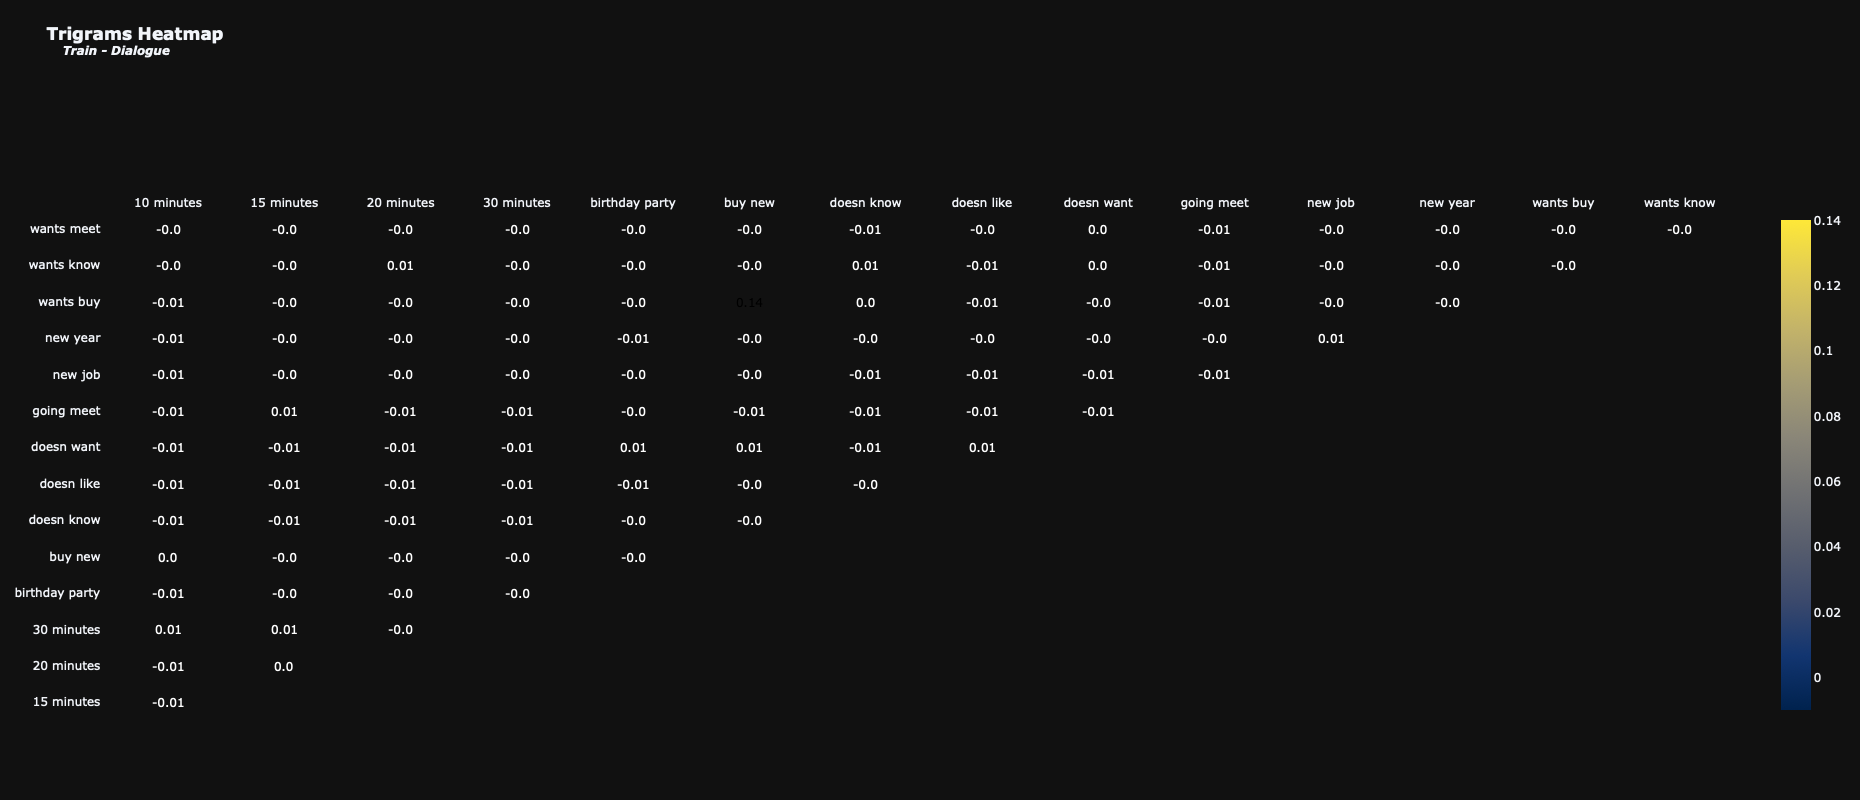

In [29]:
vectorizer=TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(3,3))
x=vectorizer.fit_transform(train['dialogue'].fillna(''))
df_tfidfvet=pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidvect, 'Trigrams', 'Train - Dialogue', 800, 800, 12)

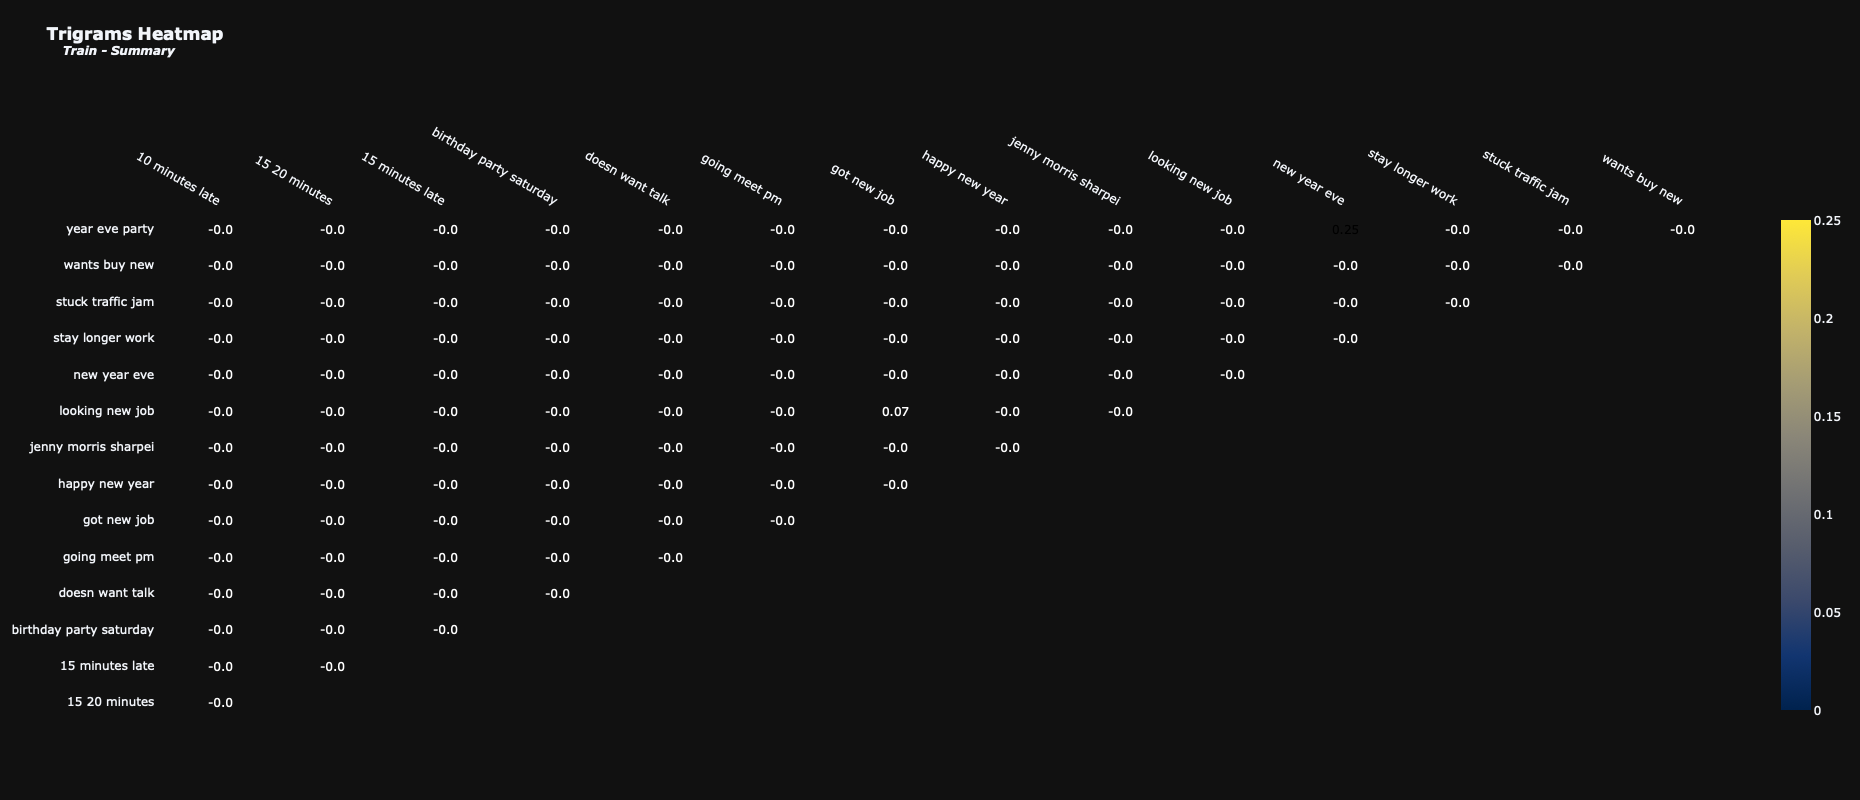

In [31]:
vectorizer=TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(3,3))
x=vectorizer.fit_transform(train['summary'].fillna(''))
df_tfidfvect=pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidfvect, 'Trigrams', 'Train - Summary', 800, 800, 12)

We can see that the terms are not strongly correlated. But still, it is possible to see pairs that seem logical to appear together in the corpus. Let's perform the exact same analysis on the test and val datasets. We expect same behavior as ones seen during the analysis of the training set. However, if something different appears, we will surely investigate further.

# Credit

* https://www.kaggle.com/code/lusfernandotorres/text-summarization-with-large-language-models/notebook